In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
plt.style.use("seaborn-v0_8")

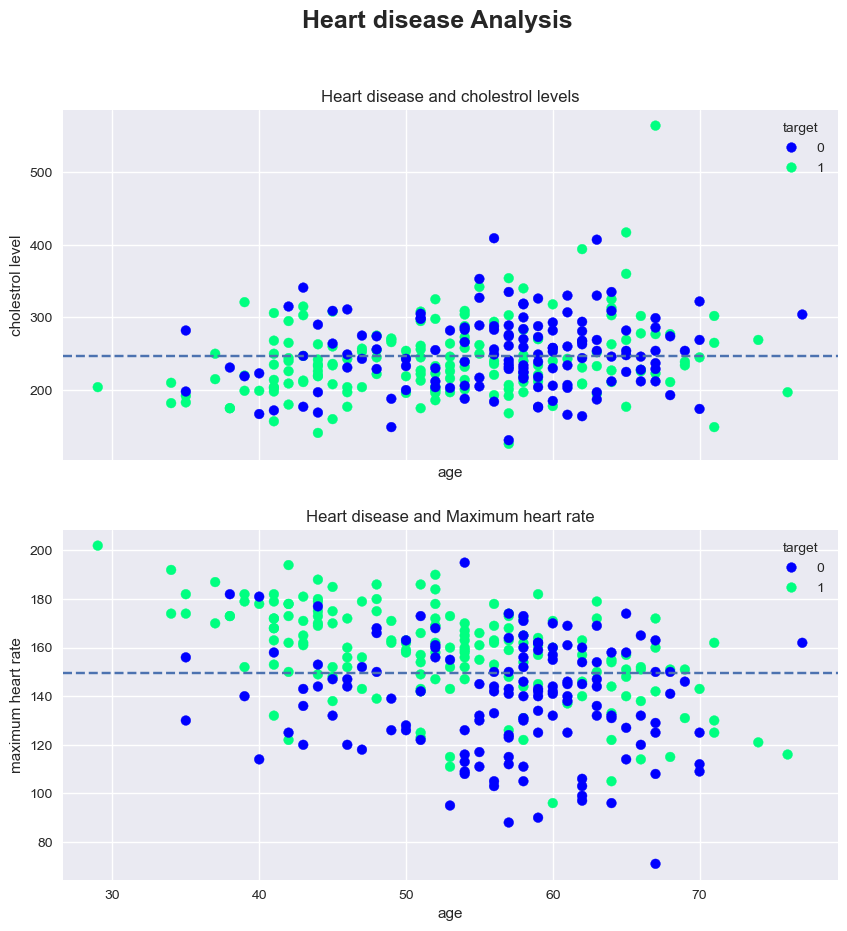

In [4]:
fig,(ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(10,10),sharex=True)

scatter1 = ax0.scatter(x=df['age'],y=df['chol'],c=df['target'],cmap="winter")
ax0.set(title="Heart disease and cholestrol levels",xlabel="age",ylabel="cholestrol level")
ax0.legend(*scatter1.legend_elements(),title='target')
ax0.axhline(df['chol'].mean(),linestyle="--")

scatter2 = ax1.scatter(x=df['age'],y=df['thalach'],c=df['target'],cmap="winter")
ax1.set(title="Heart disease and Maximum heart rate",xlabel="age",ylabel="maximum heart rate")
ax1.legend(*scatter2.legend_elements(),title="target")
ax1.axhline(df['thalach'].mean(),linestyle='--')

fig.suptitle("Heart disease Analysis",fontsize=18,fontweight="bold");

In [5]:
from sklearn.preprocessing import StandardScaler

binary_features = ['sex', 'fbs', 'exang']
multi_class_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df_encoded = pd.get_dummies(df, columns=multi_class_features, drop_first=True)

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

X = df_encoded.drop(columns=['target'])  # Features
y = df_encoded['target']  # Target
#saving the preprocessed file's
X.to_csv("preprocessed_features.csv", index=False)
y.to_csv("preprocessed_target.csv", index=False)

### Model 1 (Logistic Regression)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
model1 = LogisticRegression(solver='liblinear', random_state=42)
model1.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [8]:
y_pred1 = model1.predict(X_test)
y_pred1

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [9]:
accuracy1 = accuracy_score(y_test, y_pred1)
classification_rep1 = classification_report(y_test, y_pred1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)

print("Model accuracy: ",accuracy1*100)
print("Classification report: \n",classification_rep1)
print("Confusion matrix: \n",conf_matrix1)

Model accuracy:  90.1639344262295
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix: 
 [[27  2]
 [ 4 28]]


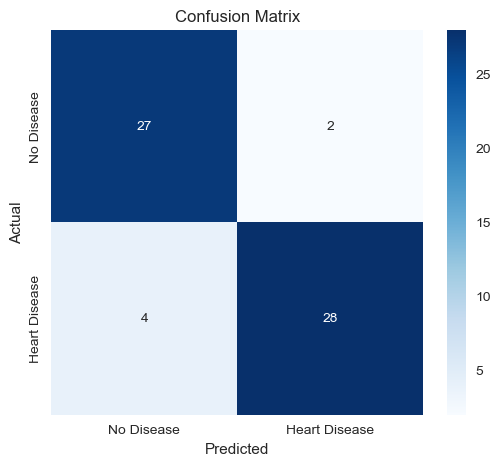

In [10]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

### Model 2 (Random Forest Classifier)

In [11]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100,random_state=42)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

y_pred2

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy2 = accuracy_score(y_test, y_pred2)
classification_rep2 = classification_report(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)

print("Accuracy Score: ",accuracy2,"\n")
print("Classification Report: ",classification_rep2,"\n")
print("Confusion matrix: ",conf_matrix2)

Accuracy Score:  0.8688524590163934 

Classification Report:                precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61
 

Confusion matrix:  [[25  4]
 [ 4 28]]


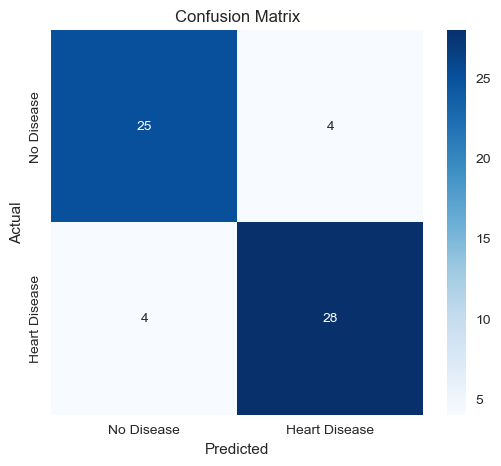

In [13]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

### Model 3 (SVM)

In [14]:
from sklearn.svm import SVC

model3 = SVC(kernel='rbf', C=1, random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

y_pred3

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy3 = accuracy_score(y_test, y_pred3)
classification_rep3 = classification_report(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

print("Accuracy Score: ",accuracy3,"\n")
print("Classification Report: ",classification_rep3,"\n")
print("Confusion matrix: ",conf_matrix3)

Accuracy Score:  0.8688524590163934 

Classification Report:                precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61
 

Confusion matrix:  [[27  2]
 [ 6 26]]


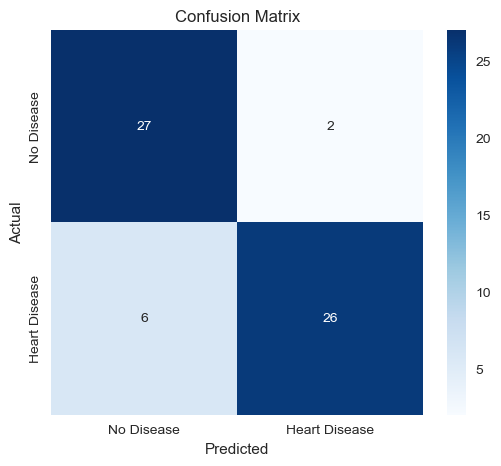

In [16]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

### Model 4(KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier(n_neighbors=5)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

y_pred4

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy4 = accuracy_score(y_test, y_pred4)
classification_rep4 = classification_report(y_test, y_pred4)
conf_matrix4 = confusion_matrix(y_test, y_pred4)

print("Accuracy Score: ",accuracy4,"\n")
print("Classification Report: ",classification_rep4,"\n")
print("Confusion matrix: ",conf_matrix4)

Accuracy Score:  0.8524590163934426 

Classification Report:                precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61
 

Confusion matrix:  [[25  4]
 [ 5 27]]


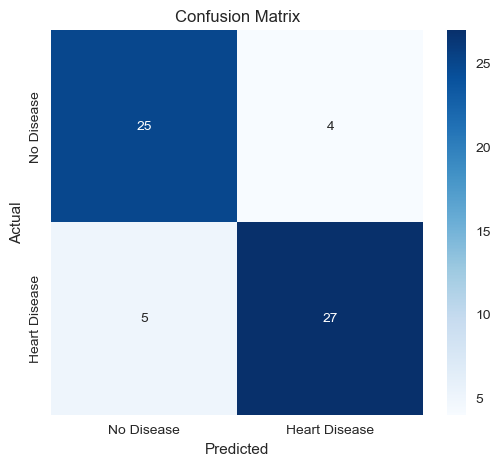

In [19]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix4, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

### Visualizing all the plots

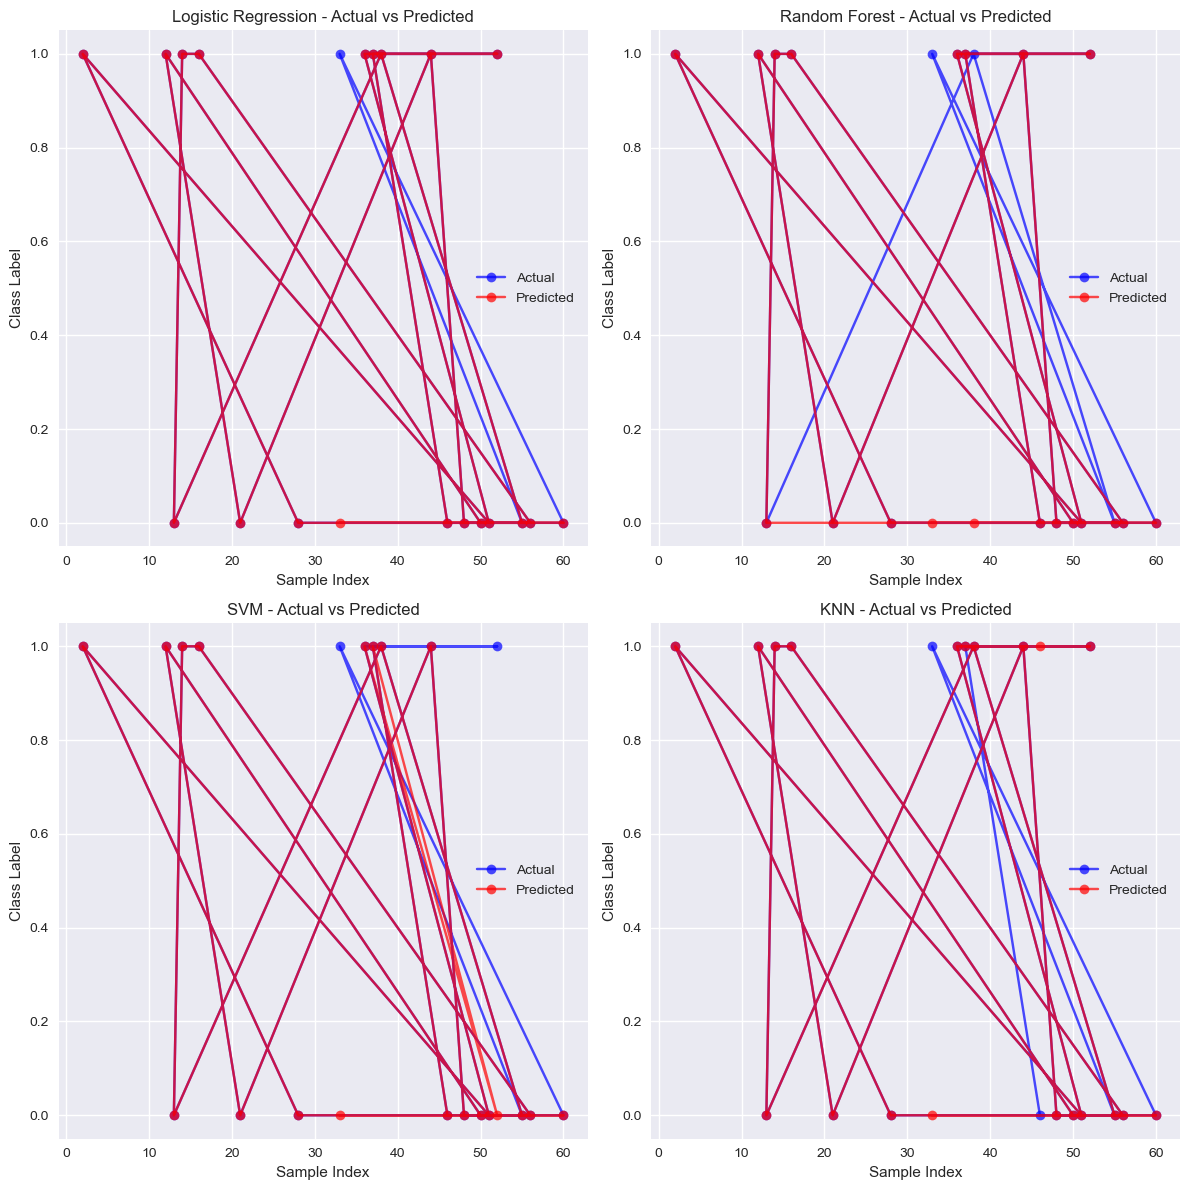

In [20]:
import numpy as np
import matplotlib.pyplot as plt

model_names = ["Logistic Regression", "Random Forest", "SVM", "KNN"]
predictions = [y_pred1, y_pred2, y_pred3, y_pred4]

# Create a 2x2 subplot for visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

sample_size = 20
indices = np.random.choice(range(len(y_test)), sample_size, replace=False)

for i, (name, y_pred) in enumerate(zip(model_names, predictions)):
    axes[i].plot(indices, y_test.iloc[indices].values, 'bo-', label="Actual", alpha=0.7)
    axes[i].plot(indices, y_pred[indices], 'ro-', label="Predicted", alpha=0.7)
    axes[i].set_title(f"{name} - Actual vs Predicted")
    axes[i].set_xlabel("Sample Index")
    axes[i].set_ylabel("Class Label")
    axes[i].legend()

plt.tight_layout()
plt.show()


In [20]:
plt.savefig("model_comparison.jpg", dpi=300,format="jpg")

<Figure size 640x480 with 0 Axes>

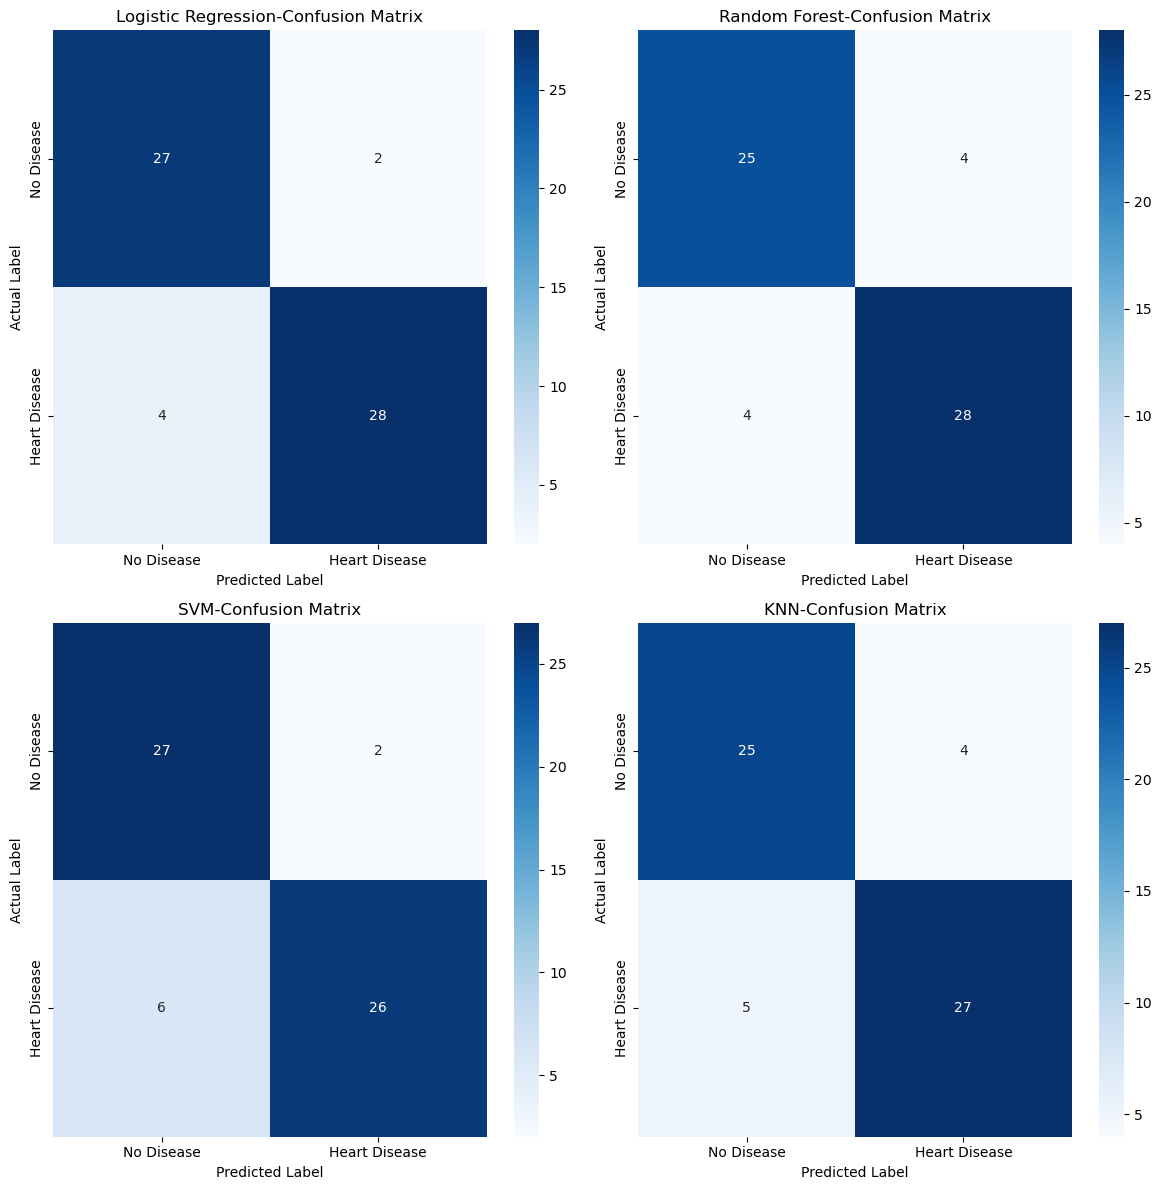

In [23]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,2,figsize=(12,12))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(zip(model_names, predictions)):
    conf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["No Disease", "Heart Disease"],
                yticklabels=["No Disease", "Heart Disease"],
                ax=axes[i])

    axes[i].set_title(f"{name}-Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("Actual Label")

plt.tight_layout()
plt.show()

In [24]:
plt.savefig("confusion_matrix_comparision.jpg",dpi=300,format="jpg")

<Figure size 640x480 with 0 Axes>

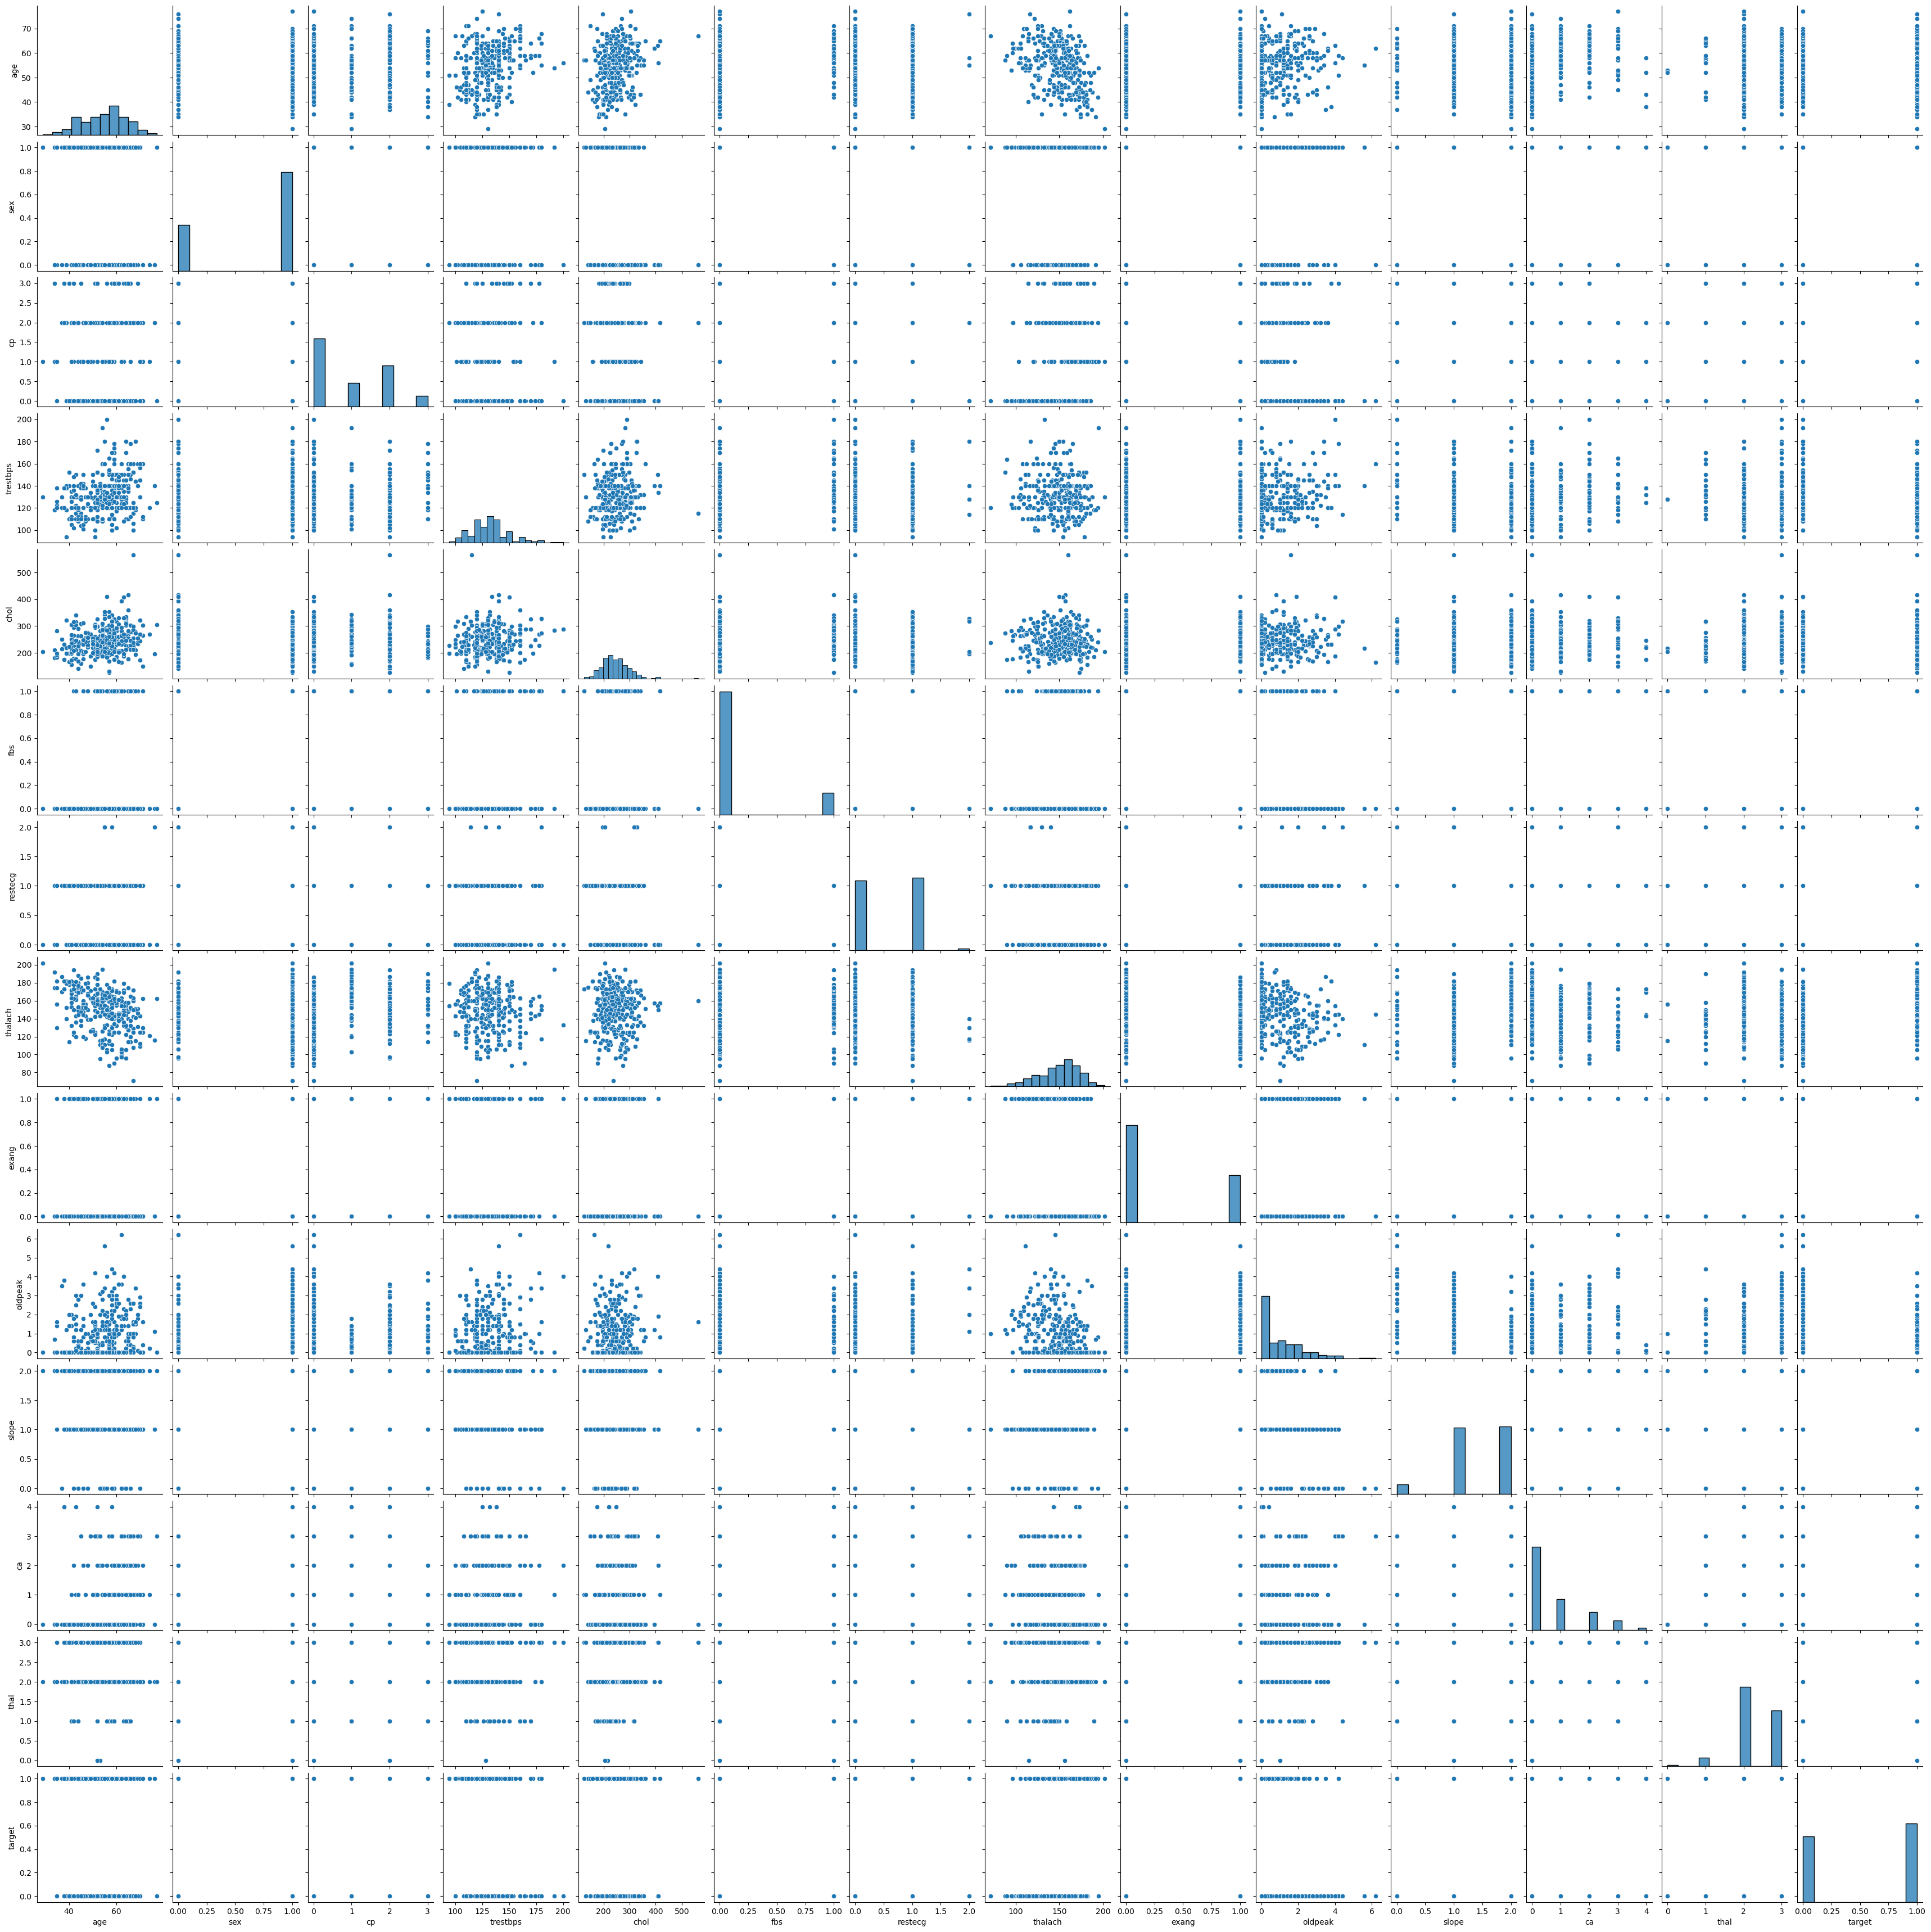

In [25]:
import seaborn as sns
sns.pairplot(df)